In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [ ]:
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import regularizers

Using TensorFlow backend.


In [4]:
dataset = pd.read_csv('Churn_Modelling.csv')

FileNotFoundError: File b'Churn_Modelling.csv' does not exist

In [159]:
# load dataset
dataset = read_csv("../data/dados_lag_status.csv", header=0)

In [160]:
dataset.head()

,h_faltas_mes1,h_faltas_mes2,h_faltas_mes3,he_mes1,he_mes2,he_mes3,status
0,0.0,0.0,0.0,0.0,0.0,0.0,ativo
1,0.0,0.0,0.0,0.0,0.0,0.0,ativo
2,0.0,0.0,0.0,0.0,0.0,0.0,ativo
3,0.0,0.0,0.0,0.0,0.0,0.0,ativo
4,0.0,0.0,0.0,0.0,0.0,0.0,ativo


In [161]:
values = dataset.values

In [162]:
values[:,6]

array(['ativo', 'ativo', 'ativo', ..., 'ativo', 'ativo', 'inativo'],
      dtype=object)

In [163]:
# integer encode direction (0 ou 1 para o meta)
encoder = LabelEncoder()
values[:,6] = encoder.fit_transform(values[:,6])

In [164]:
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [165]:
# split into train and test sets
slice = round(0.4*len(values),0)
slice = int(slice)

In [166]:
train = values[:slice, :]
test = values[slice:, :]

In [167]:
test[:,6]

array([0., 0., 0., ..., 0., 0., 1.], dtype=float32)

In [168]:
meta_test = test[:,(test_X.shape[1]-1)]   #só o meta para o conjunto de teste

In [169]:
meta_test.shape

(624167,)

In [170]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [171]:
test_X.shape

(624167, 6)

In [172]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 3, 2))
test_X = test_X.reshape((test_X.shape[0], 3, 2))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 

(416111, 3, 2) (416111,) (624167, 3, 2) (624167,)


Train on 416111 samples, validate on 624167 samples
Epoch 1/2
 - 58s - loss: 0.0842 - acc: 0.9935 - val_loss: 0.3120 - val_acc: 0.9580
Epoch 2/2
 - 56s - loss: 0.0650 - acc: 0.9939 - val_loss: 0.2072 - val_acc: 0.9580


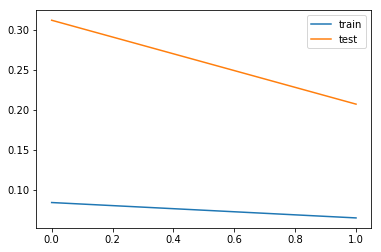

In [173]:
# design network
model = Sequential()
model.add(LSTM(100, kernel_regularizer=regularizers.l2(0.01), input_shape=(train_X.shape[1], train_X.shape[2]))) #input_shape = (time_step, number of features)
model.add(Dense(1,activity_regularizer=regularizers.l1(0.01)))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #alterei para adpatar para classificacao
# fit network
# it could be good to use a batch size equal to the number of registers per "matricula" (maybe use the mean)
history = model.fit(train_X, train_y, epochs=2, batch_size=40, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 

In [174]:
# make a prediction
yhat = model.predict(test_X)

In [175]:
np.savetxt('../results/test.txt', (yhat))

In [176]:
np.savetxt('../results/meta_test.txt', test[:,6])